# Lead Scoring Case Study

# Problem Statement

### An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

### The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

### Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

### X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the Case Study

### 1.Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### 2.There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. 

# The steps are following:

### 1.Reading  and Inspecting the data
### 2.Clean the data(Exploratry Data Analysis)
### 3.Data Preperation
### 4.Model Building
### 5.Model Evaluation


#  Step 1: Reading and Inspecting the data 

## Import the Necessary Libraries

In [1272]:
import warnings
warnings.filterwarnings('ignore')

In [1273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Set_option to avoid truncation of columns and rows:-

In [1401]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [1402]:
# Importing the data set
leads_data=pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1403]:
leads_data.shape

(9240, 37)

In [1404]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1405]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1406]:
leads_data.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [1407]:
# checking for the duplicates
sum(leads_data.duplicated(subset = 'Lead Number')) == 0

#leads_data.drop_duplicates(subset=None, inplace=True)

True

In [1408]:
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1409]:
leads_data.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

## Insights
Total are total 7 numeric columns and 30 categorical columns.
None of the columns have inconsistent datatype, hence no conversion is required.

# Step 2: Exploratry Data Analysis

## Data Cleaning and Preperation

In [1410]:
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [1411]:
leads_data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [1412]:
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1413]:
leads_data.shape

(9240, 35)

In [1414]:
# Finiding column name where column label have 'select'
cols=list(leads_data.columns)
for i in cols:
    if 'Select' in leads_data[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


In [1415]:
leads_data = leads_data.replace('Select', np.nan)

In [1416]:
cols=list(leads_data.columns)
for i in cols:
    if 'Select' in leads_data[i].values:
        print(i)

In [1417]:
round(100*(leads_data.isnull().sum()/len(leads_data)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [1418]:
Cols_To_Drops = list(leads_data.columns[100*leads_data.isnull().mean()>40])
print(Cols_To_Drops)

['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [1419]:
leads_data.drop(Cols_To_Drops,axis=1,inplace=True)
100*leads_data.isnull().mean()

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [1420]:
leads_data.shape

(9240, 28)

In [1421]:
leads_data['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

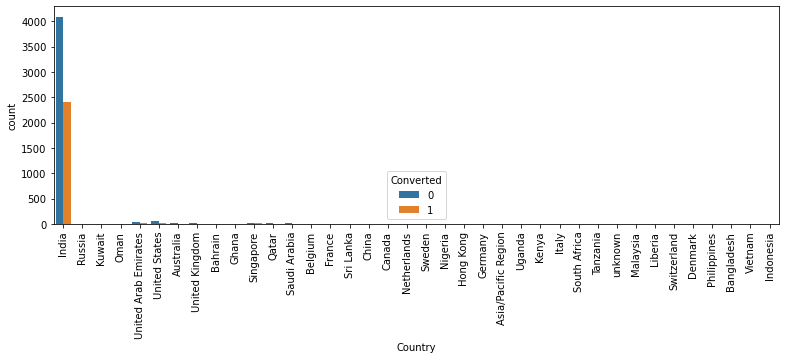

In [1422]:
#plotting spread of Country columnn 
plt.figure(figsize=(13,4))
s1=sns.countplot(leads_data.Country, hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### As we can see India is most commen occurance among all the countries this column can be dropped

In [1423]:
leads_data.drop(['Country'], 1,inplace= True)

In [1424]:
leads_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1425]:
leads_data['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [1426]:
leads_data['City'] = leads_data['City'].replace(np.nan,'Mumbai')

In [1427]:
leads_data['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

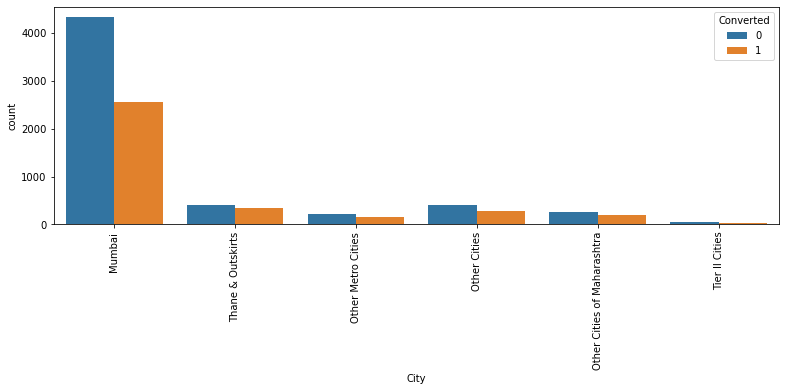

In [1428]:
#plotting spread of City columnn 
plt.figure(figsize=(13,4))
s1=sns.countplot(leads_data.City, hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1429]:
leads_data['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

<AxesSubplot:>

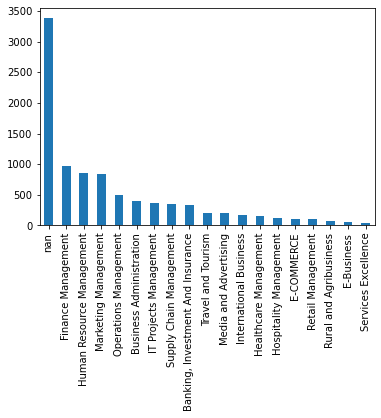

In [1430]:
leads_data['Specialization'].value_counts(dropna=False).plot.bar()

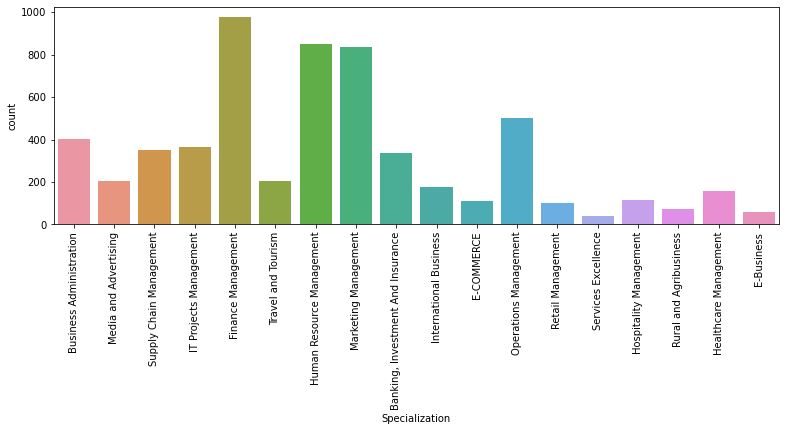

In [1431]:
plt.figure(figsize=(13,4))
sns.countplot(leads_data['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [1432]:
#all the value of nan which not have specified the specilization So we will replace NaN values here with 'Not Specified'
leads_data['Specialization'] = leads_data['Specialization'].replace(np.nan, 'Not Specified')

<AxesSubplot:>

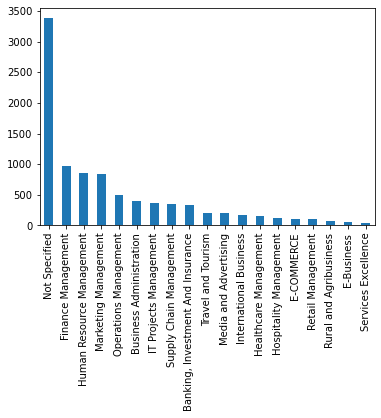

In [1433]:
leads_data['Specialization'].value_counts(dropna=False).plot.bar()

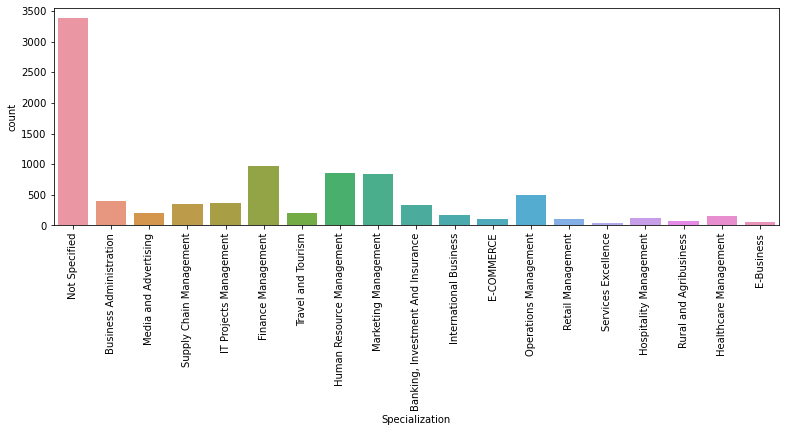

In [1434]:
plt.figure(figsize=(13,4))
sns.countplot(leads_data['Specialization'])
plt.xticks(rotation=90)
plt.show()

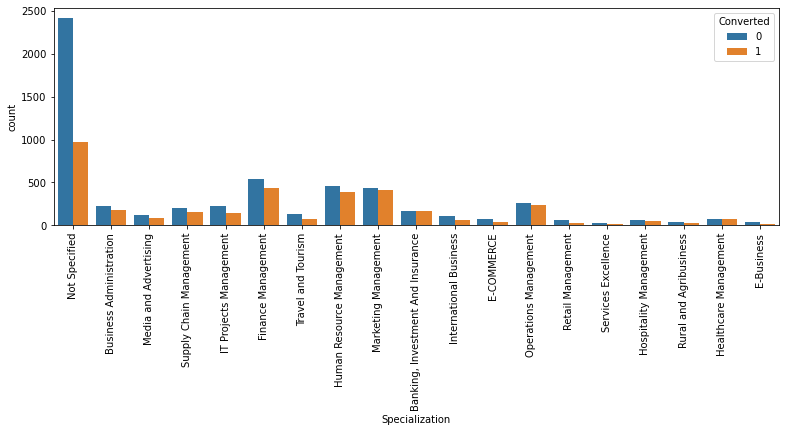

In [1435]:
plt.figure(figsize=(13,4))
s1=sns.countplot(leads_data.Specialization, hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### As we can see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

In [1436]:
leads_data['Specialization'] = leads_data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

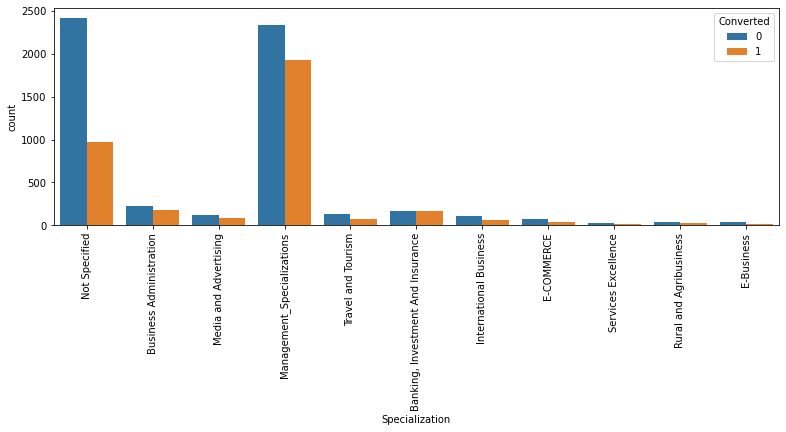

In [1437]:
plt.figure(figsize=(13,4))
s1=sns.countplot(leads_data.Specialization, hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1438]:
leads_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1439]:
#imputing Nan values with mode "Unemployed"

leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [1440]:
leads_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

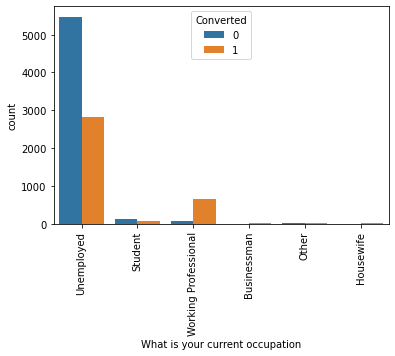

In [1441]:
s1=sns.countplot(leads_data['What is your current occupation'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### working professional are higlely intrested as comapare to others for joining this course 
### Unemployed leads are the most in terms of Absolute numbers.

In [1442]:
#checking value counts

leads_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1443]:
#replacing Nan values with Mode "Better Career Prospects"

leads_data['What matters most to you in choosing a course'] = leads_data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

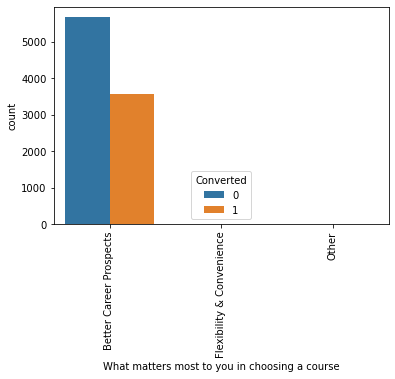

In [1444]:
s1=sns.countplot(leads_data['What matters most to you in choosing a course'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1445]:
leads_data.drop(['What matters most to you in choosing a course'],1,inplace=True )

In [1446]:
leads_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City',
       'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1447]:
Cols_To_Drops.append(['Country','What matters most to you in choosing a course'])

In [1448]:
Cols_To_Drops

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 ['Country', 'What matters most to you in choosing a course']]

In [1449]:
leads_data.shape

(9240, 26)

In [1450]:
leads_data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [1451]:
#replacing Nan values with "Not Specified"
leads_data['Tags'] = leads_data['Tags'].replace(np.nan,'Not Mentioned')

<AxesSubplot:>

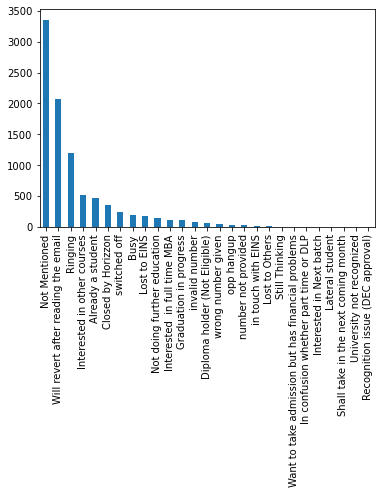

In [1452]:
leads_data['Tags'].value_counts(dropna=False).plot.bar()

### As we can see tha 'will revert after reading the email' having most chances for leads conversion

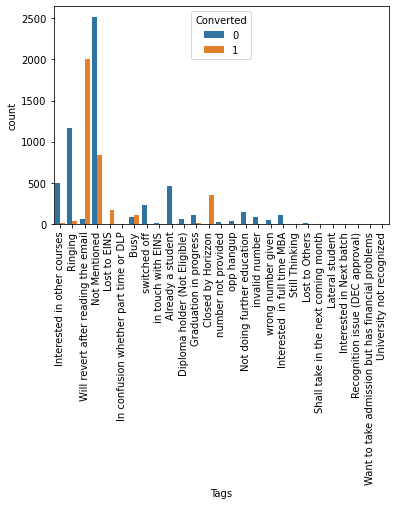

In [1453]:
s1=sns.countplot(leads_data['Tags'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1454]:
leads_data['Tags'] = leads_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'], 'NotUseful_Tags')


<AxesSubplot:>

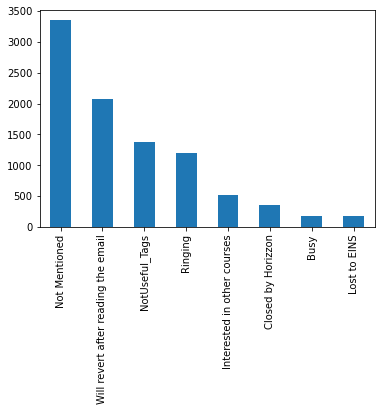

In [1455]:
leads_data['Tags'].value_counts(dropna=False).plot.bar()

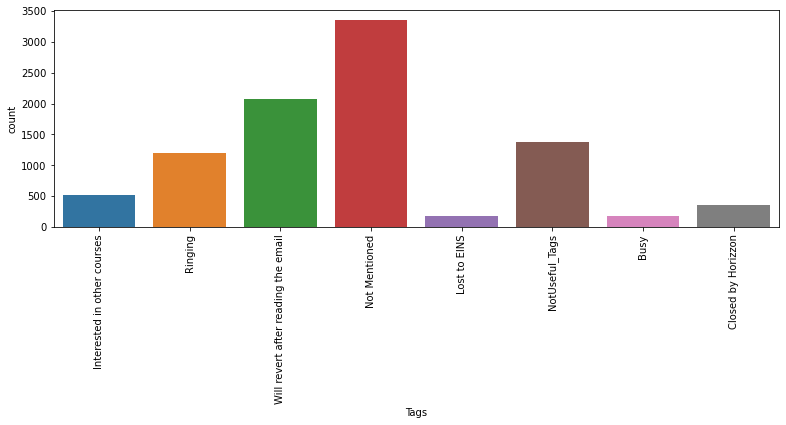

In [1456]:
plt.figure(figsize=(13,4))
sns.countplot(leads_data['Tags'])
plt.xticks(rotation=90)
plt.show()

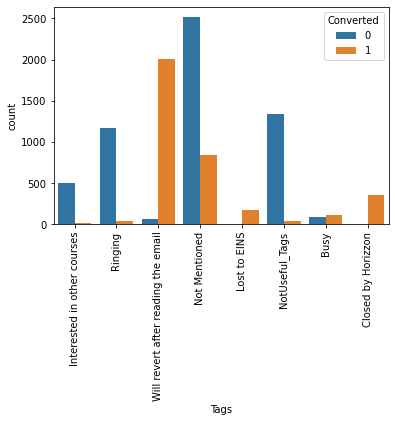

In [1457]:
s1=sns.countplot(leads_data['Tags'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1458]:
round((100*leads_data.isnull().sum()/len(leads_data)),2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

In [1459]:
leads_data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [1460]:
leads_data['Lead Source'] = leads_data['Lead Source'].replace(np.nan,'Others')

In [1461]:
leads_data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Others                 36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

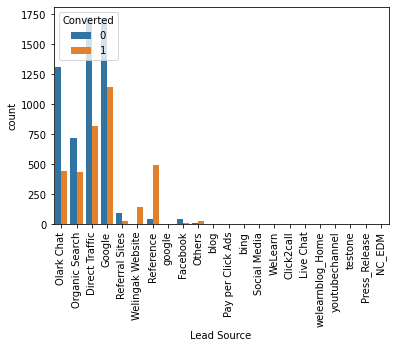

In [1462]:
s1=sns.countplot(leads_data['Lead Source'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1463]:
#replacing Nan Values and combining low frequency values

leads_data['Lead Source'] = leads_data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Social Media','google'] ,'NotUseful_LeadSource')  

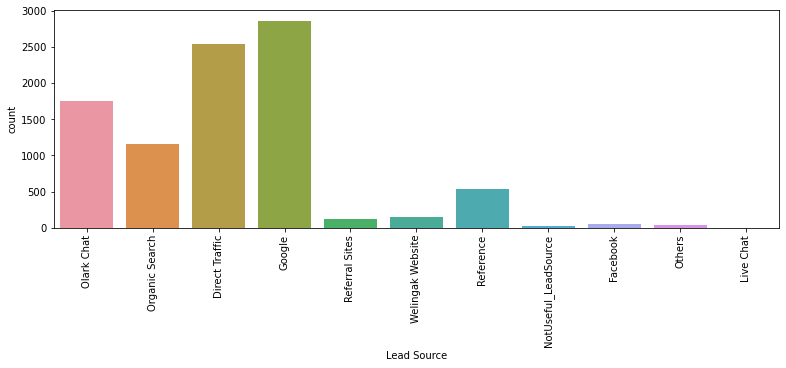

In [1464]:
plt.figure(figsize=(13,4))
sns.countplot(leads_data['Lead Source'])
plt.xticks(rotation=90)
plt.show()

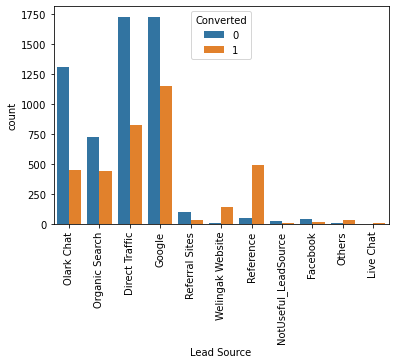

In [1465]:
s1=sns.countplot(leads_data['Lead Source'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Maximum number of leads are obtained by Google and DirectTraffic
#### Olark Chat and OrganicResearch conversion rate is also high

In [1466]:
leads_data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [1467]:

leads_data['Last Activity'] = leads_data['Last Activity'].replace(np.nan,'Others')

In [1468]:
leads_data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Others                           103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

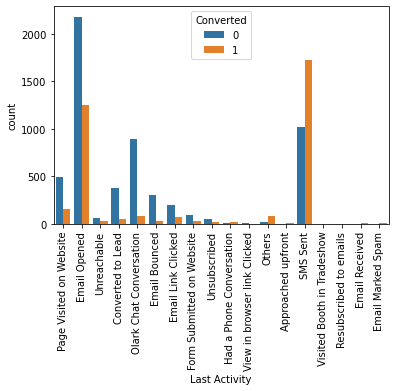

In [1469]:
s1=sns.countplot(leads_data['Last Activity'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1470]:

leads_data['Last Activity'] = leads_data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'NotUseful_LastActivity')

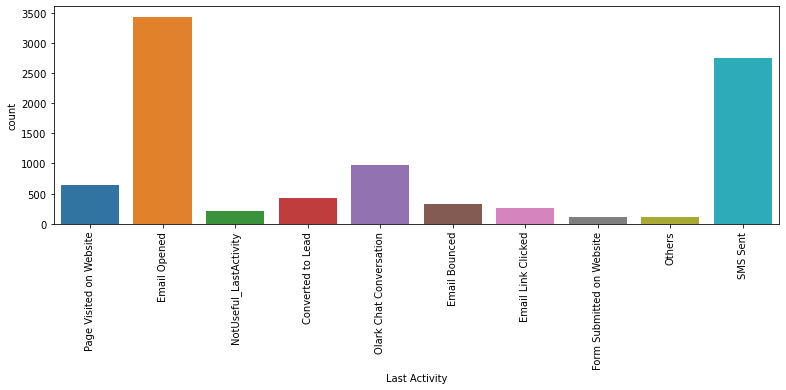

In [1471]:
plt.figure(figsize=(13,4))
sns.countplot(leads_data['Last Activity'])
plt.xticks(rotation=90)
plt.show()

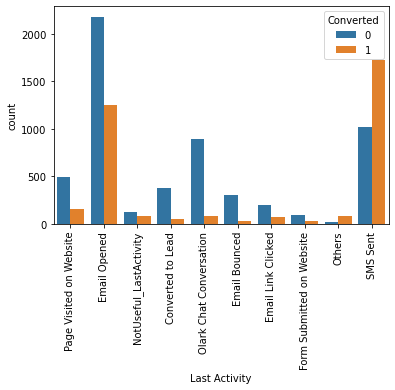

In [1472]:
s1=sns.countplot(leads_data['Last Activity'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### as we can see hear SMS sent and Email Opened ahving high rate of conversion

In [1473]:
round((100*leads_data.isnull().sum()/len(leads_data)),2)

Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

In [1474]:
#Drop all rows which have Nan Values.
leads_data = leads_data.dropna()

In [1475]:
round((100*leads_data.isnull().sum()/len(leads_data)),2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

In [1476]:
leads_data['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

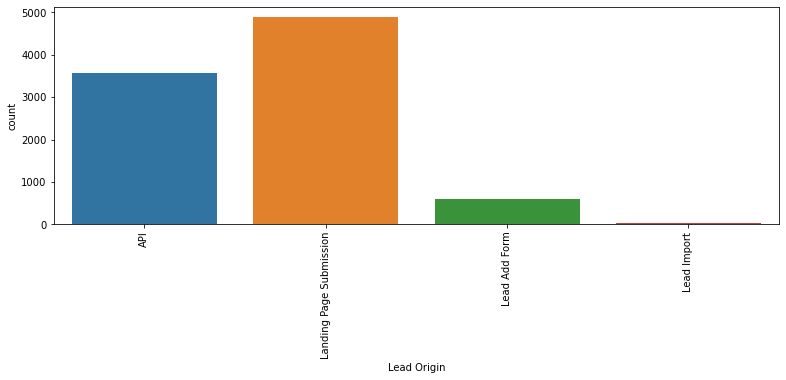

In [1477]:
plt.figure(figsize=(13,4))
sns.countplot(leads_data['Lead Origin'])
plt.xticks(rotation=90)
plt.show()

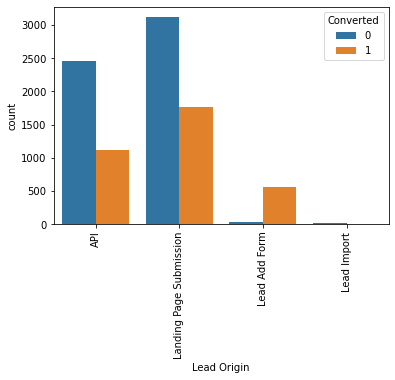

In [1478]:
s1=sns.countplot(leads_data['Lead Origin'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Here we can see that Landing Page Submission and API are having a higher rates of conversion. Lead Origin is impotant variable of analysis
### Lead Import and Quick Add Form get very few leads.
### In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form

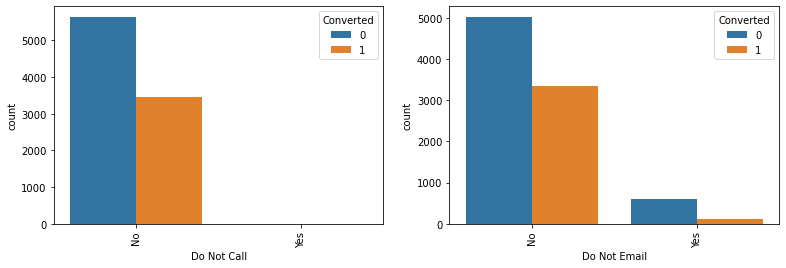

In [1479]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(13,4))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads_data['Do Not Call'], hue=leads_data.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leads_data['Do Not Email'], hue=leads_data.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [1480]:
#checking value counts for Do Not Call
leads_data['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [1481]:
leads_data['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [1482]:
#append the 'Do not Call' column to drop list becoz its not having useful data for analysis
Cols_To_Drops.append('Do Not Call')
Cols_To_Drops

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 ['Country', 'What matters most to you in choosing a course'],
 'Do Not Call']

In [1483]:
leads_data.drop(['Do Not Call'],1,inplace= True)

In [1484]:
leads_data.shape

(9103, 25)

In [1485]:
leads_data.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [1486]:
leads_data.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [1487]:
leads_data['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [1488]:
leads_data['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [1489]:
leads_data['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [1490]:
leads_data['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [1491]:
leads_data['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [1492]:
leads_data['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [1493]:
leads_data['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [1494]:
leads_data['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [1495]:
leads_data['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [1496]:
leads_data['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [1497]:
#adding imbalanced columns to the list of columns to be dropped

Cols_To_Drops.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [1498]:
Cols_To_Drops

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 ['Country', 'What matters most to you in choosing a course'],
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [1499]:
leads_data.drop(['Search','Magazine','Newspaper Article','X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque'],1,inplace= True)

In [1500]:
leads_data.shape

(9103, 14)

In [1501]:
leads_data.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [1502]:
leads_data['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

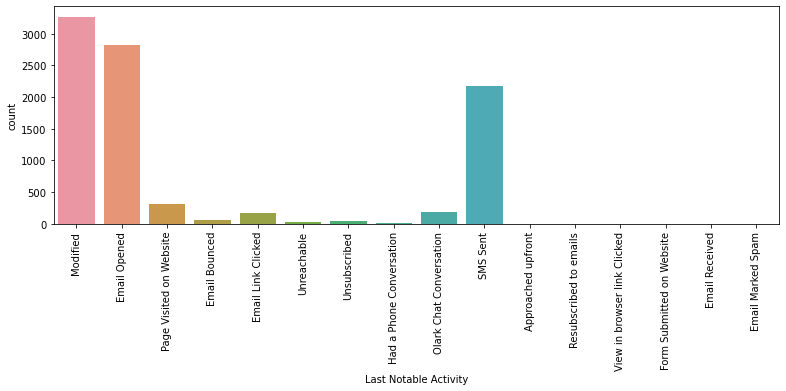

In [1503]:
plt.figure(figsize=(13,4))
sns.countplot(leads_data['Last Notable Activity'])
plt.xticks(rotation=90)
plt.show()

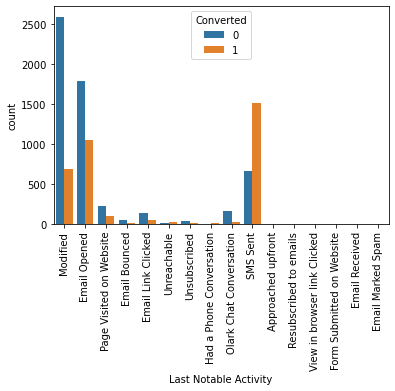

In [1504]:
s1=sns.countplot(leads_data['Last Notable Activity'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1505]:
leads_data['Last Notable Activity']  = leads_data['Last Notable Activity'].replace(['Had a Phone Conversation',
'Email Marked Spam',
'Approached upfront',                 
'Resubscribed to emails',             
'View in browser link Clicked',     
'Form Submitted on Website',          
'Email Received','Unsubscribed',
'Unreachable','Email Bounced'],'Notuseful_Last Notable Activity')

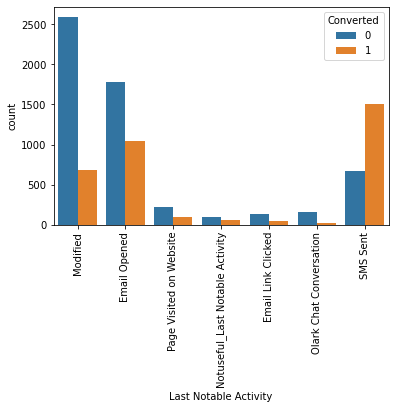

In [1506]:
s1=sns.countplot(leads_data['Last Notable Activity'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### As we can see that SMS sent and Email Opened having high leads conversion rate .So 'Last Notable Activity' is important variable for the analysis

In [1507]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

In [1508]:
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,NotUseful_LastActivity,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [1509]:
leads_data.shape

(9103, 14)

In [1510]:
leads_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


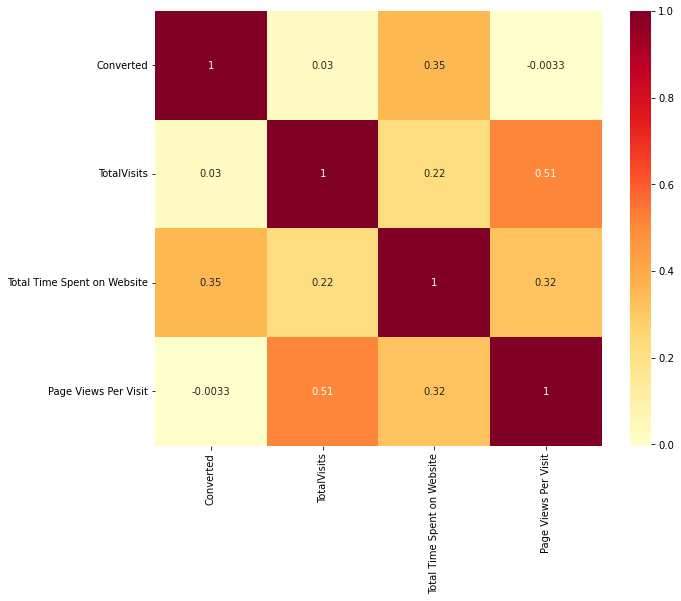

In [1511]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads_data.corr(), cmap="YlOrRd", annot=True)
plt.show()

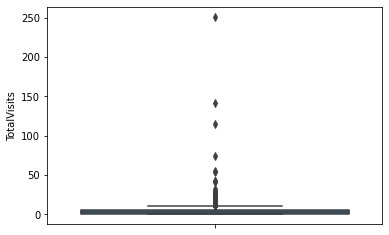

In [1512]:
#Total Visit
#Checking Outliers for nummerical variables

plt.figure(figsize=(6,4))
sns.boxplot(y=leads_data['TotalVisits'])
plt.show()

In [1513]:
leads_data['TotalVisits'].describe(percentiles=[0.05,0.25,0.5,0.75,0.90,0.95,0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

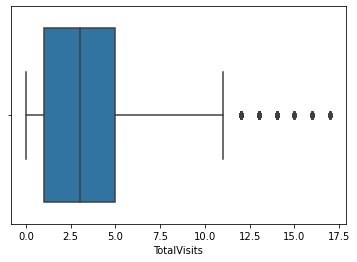

In [1514]:
# Outliers Treatment
Q3 =leads_data.TotalVisits.quantile(0.99)
leads_data = leads_data[(leads_data.TotalVisits)<=Q3] 
Q1 = leads_data.TotalVisits.quantile(0.01)
leads_data =leads_data[(leads_data.TotalVisits)>=Q1]
sns.boxplot(leads_data['TotalVisits'])
plt.show()

In [1515]:
leads_data['Total Time Spent on Website'].describe(percentiles=[0.05,0.25,0.5,0.75,0.90,0.95,0.99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

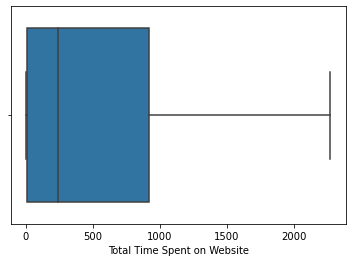

In [1516]:
sns.boxplot(leads_data['Total Time Spent on Website'])
plt.show()

### Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column

In [1517]:
leads_data['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

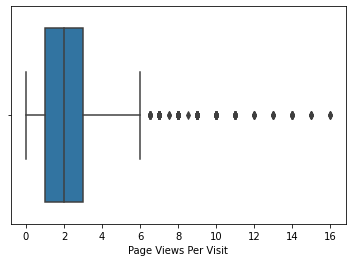

In [1518]:
sns.boxplot(leads_data['Page Views Per Visit'])
plt.show()

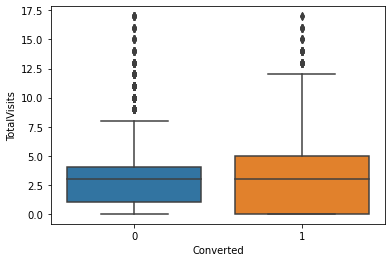

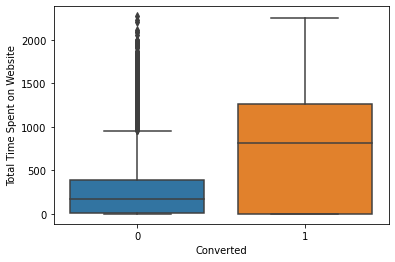

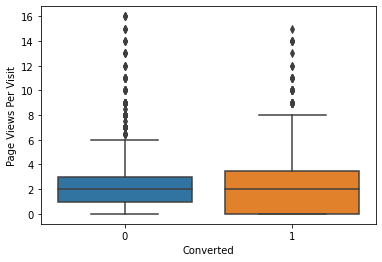

In [1519]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data)
plt.show()

#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x='Converted', y='Total Time Spent on Website',data = leads_data)
plt.show()


#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x='Converted',y='Page Views Per Visit',data= leads_data)
plt.show()

### Inference

Leads spending more time on the website are having high chances of leads conversion.
Website should be made more engaging to make leads spend more time.


In [1520]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
Converted

37.971175166297115

In [1521]:



Num_col = [i for i in leads_data.select_dtypes(include = np.number).columns if i not in ['Converted']]
Num_col

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [1522]:
Obj_col = [i for i in leads_data.select_dtypes(include=np.object).columns]
Obj_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

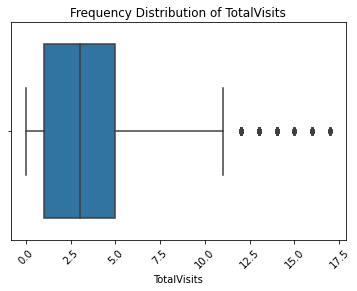

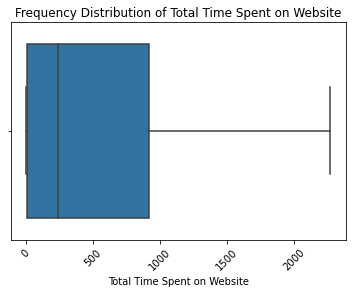

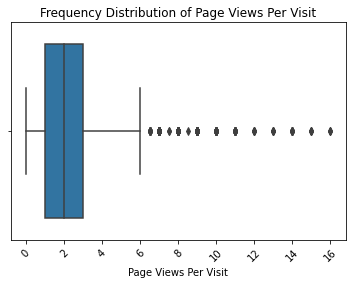

In [1523]:
 for i in Num_col:
    sns.boxplot(leads_data[i])
    plt.xlabel(i)
    plt.title("Frequency Distribution of "+i)
    plt.xticks(rotation=45)
    plt.show()

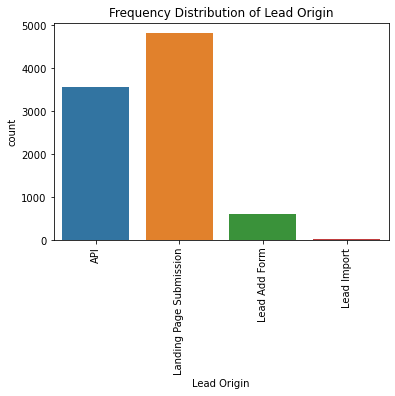

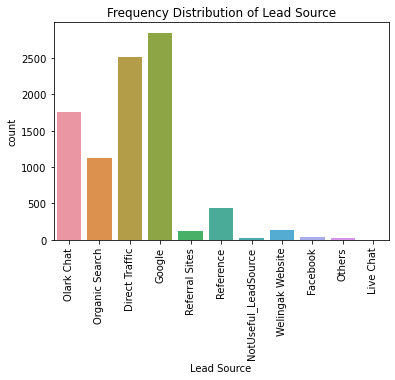

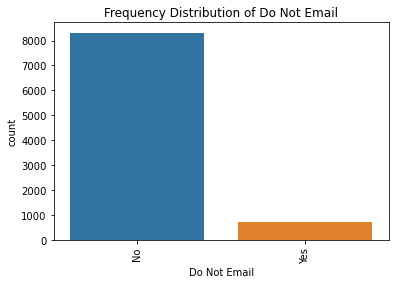

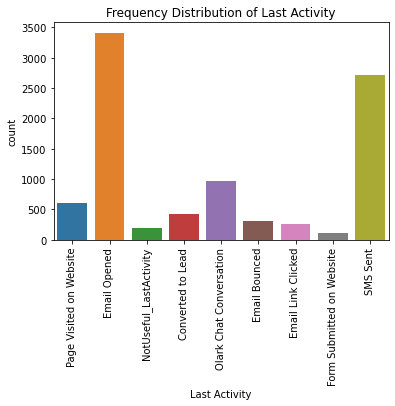

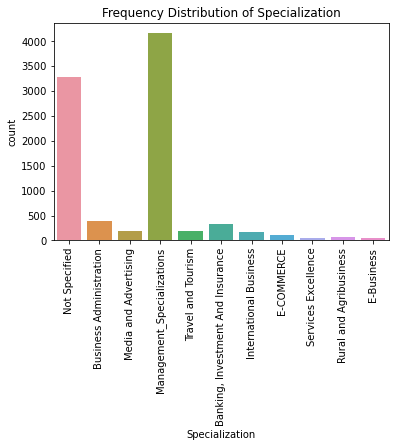

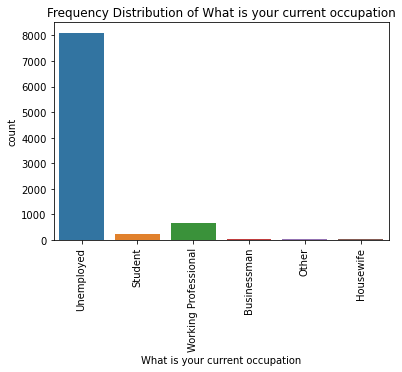

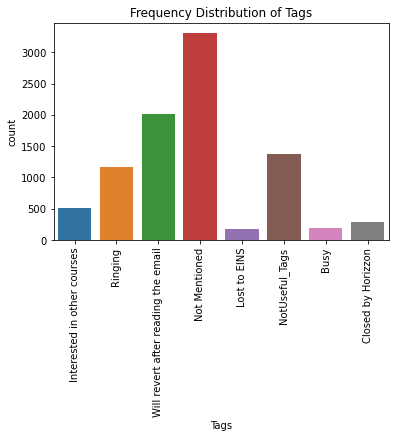

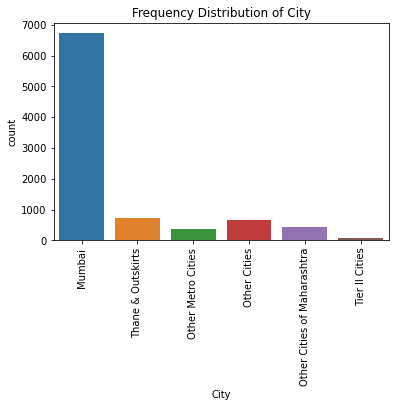

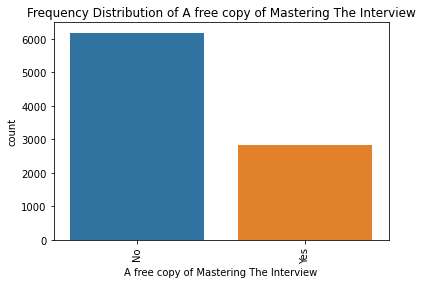

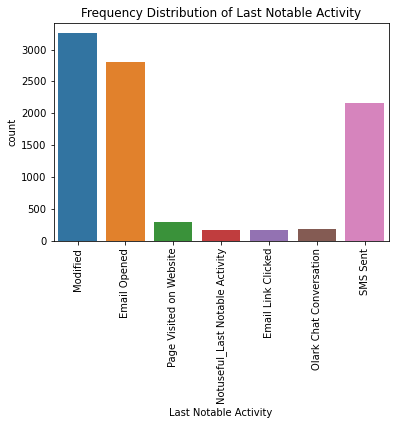

In [1524]:
 for i in Obj_col:
    sns.countplot(leads_data[i])
    plt.xlabel(i)
    plt.title("Frequency Distribution of "+i)
    plt.xticks(rotation=90)
    plt.show()

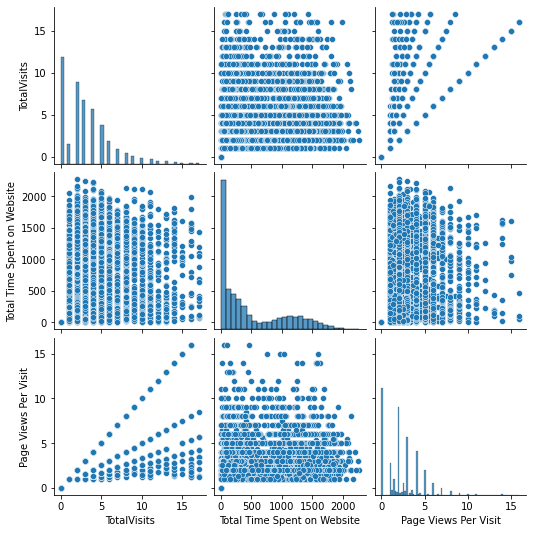

In [1525]:
sns.pairplot(data=leads_data,vars=[ 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']) 
plt.show()

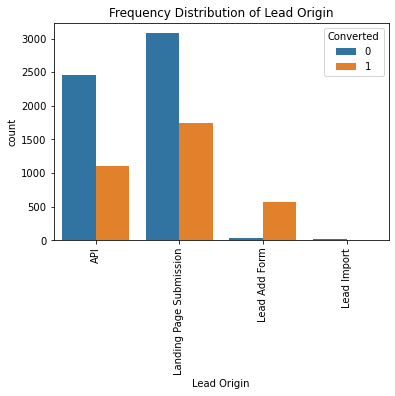

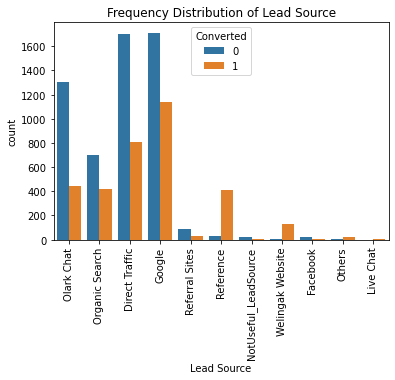

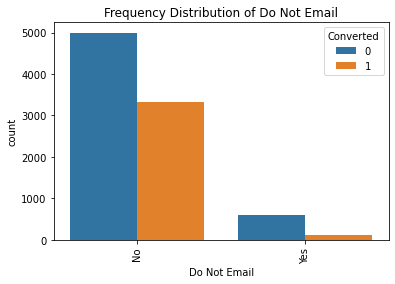

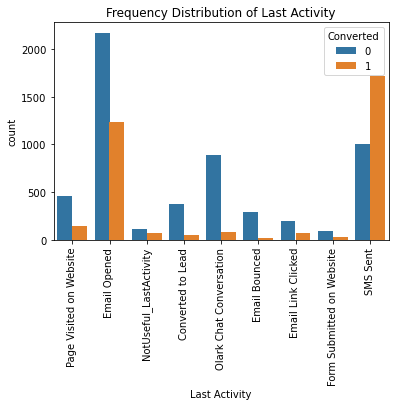

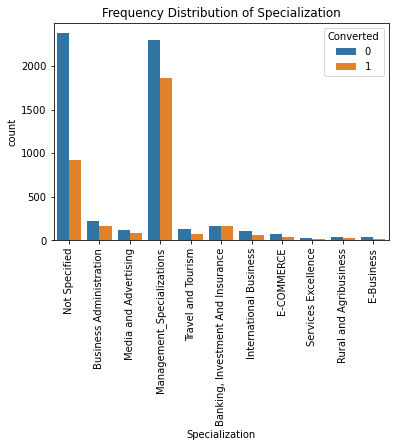

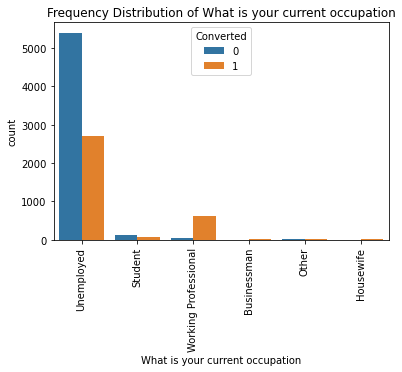

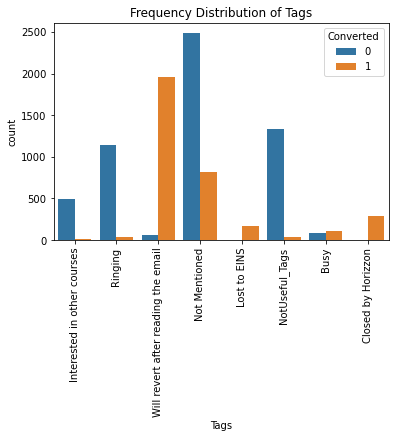

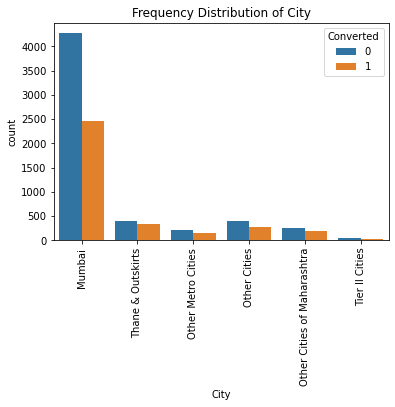

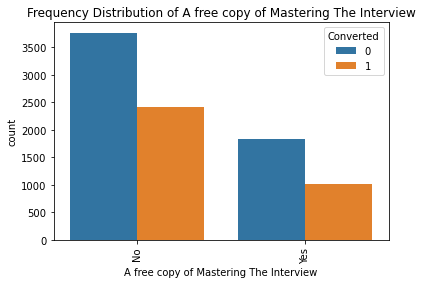

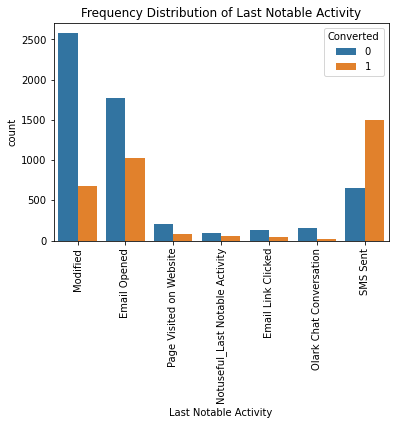

In [1526]:
 for i in Obj_col:
    sns.countplot(leads_data[i],hue =leads_data.Converted)
    plt.xlabel(i)
    plt.title("Frequency Distribution of "+i)
    plt.xticks(rotation=90)
    plt.show()


# Step 3: Data Preparation

### Dummy Variable Creation

In [1271]:
# Check the columns which are of type 'object'


list_object = leads_data.loc[:, leads_data.dtypes == 'object']
list_object.columns


Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [1067]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

In [1068]:
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,NotUseful_LastActivity,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [1069]:
leads_data.shape

(9020, 14)

In [1070]:
get_dummy = pd.get_dummies(leads_data[['Lead Origin', 
                                       'Lead Source', 
                                       'Do Not Email', 
                                       'Last Activity', 
                                       'Specialization', 
                                       'What is your current occupation', 
                                       'Tags', 'City', 'A free copy of Mastering The Interview', 
                                       'Last Notable Activity']], drop_first=True)

In [1071]:
leads_data = pd.concat([leads_data,get_dummy],axis =1)

In [1072]:
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Do Not Email,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NotUseful_LeadSource,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_NotUseful_LastActivity,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Mentioned,Tags_NotUseful_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Notuseful_Last Notable Activity,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,NotUseful_LastActivity,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [1073]:
leads_data =leads_data.drop(['Lead Origin', 'Lead Source', 
                             'Do Not Email', 'Last Activity', 'Specialization',
                             'What is your current occupation', 'Tags', 'City', 'A free copy of Mastering The Interview', 
                             'Last Notable Activity'],1)

In [1074]:
leads_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NotUseful_LeadSource,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_NotUseful_LastActivity,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Mentioned,Tags_NotUseful_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Notuseful_Last Notable Activity,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [1075]:
leads_data.shape

(9020, 58)

In [1076]:
leads_data.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NotUseful_LeadSource', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Others', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website', 'Last Activity_NotUseful_LastActivity', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_International Business', 'Specialization_Management_Specializations', 'Specialization_Media and Advertising',
       'Specialization

In [1077]:
leads_data.drop(['Lead Source_NotUseful_LeadSource',
                 'Last Activity_NotUseful_LastActivity',
                 'Specialization_Not Specified','Tags_NotUseful_Tags',
                'Last Notable Activity_Notuseful_Last Notable Activity'],1,inplace =True)

In [1078]:
leads_data.shape

(9020, 53)

In [1079]:
leads_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Mentioned,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


### Looking at Corelations

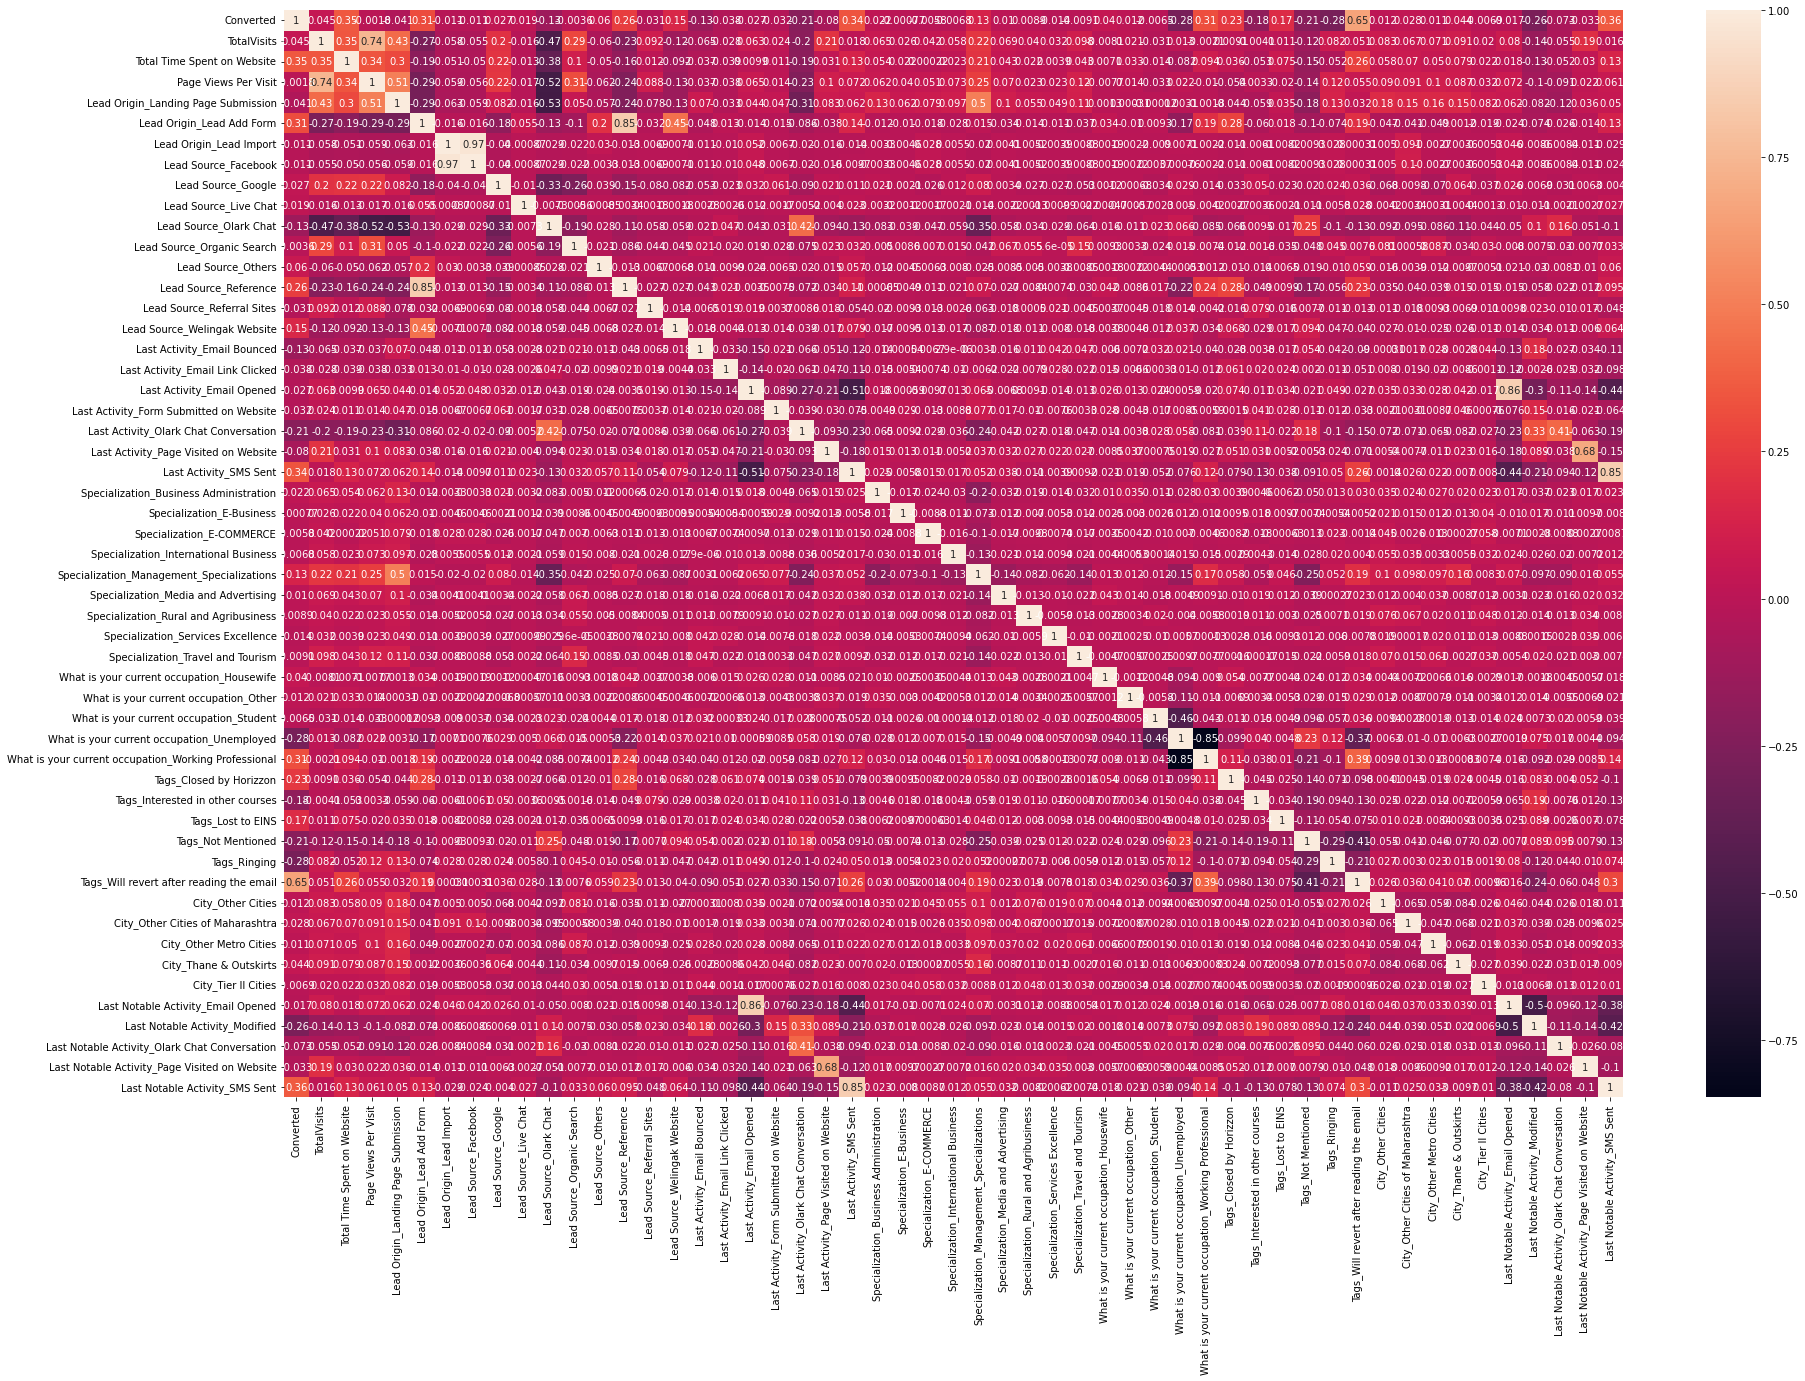

In [1080]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(leads_data.corr(),annot = True)
plt.show()

# Step 4: Model Building

### Test Train split

In [1081]:
# Import the required library

from sklearn.model_selection import train_test_split


In [1082]:
# Put all the feature variables in X
X = leads_data.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Mentioned,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [1083]:
#Put the target variable in y

y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1084]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [1085]:
X_train.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Mentioned,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2873,4.0,494,4.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6823,7.0,1780,7.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7258,0.0,0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
8327,8.0,1558,2.67,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5940,1.0,94,1.00,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0


In [1086]:
X_train.shape

(6314, 52)

In [1087]:
y_train.head()

2873    1
6823    1
7258    0
8327    1
5940    0
Name: Converted, dtype: int64

In [1088]:
y_train.shape

(6314,)

In [1089]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Mentioned,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5130,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
6929,5.0,29,5.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1484,4.0,125,4.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
6519,2.0,1581,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
7472,2.0,1386,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1


In [1090]:
X_test.shape

(2706, 52)

In [1091]:
y_test.shape

(2706,)

In [1092]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6314 entries, 2873 to 5783
Data columns (total 52 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6314 non-null   float64
 1   Total Time Spent on Website                           6314 non-null   int64  
 2   Page Views Per Visit                                  6314 non-null   float64
 3   Lead Origin_Landing Page Submission                   6314 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6314 non-null   uint8  
 5   Lead Origin_Lead Import                               6314 non-null   uint8  
 6   Lead Source_Facebook                                  6314 non-null   uint8  
 7   Lead Source_Google                                    6314 non-null   uint8  
 8   Lead Source_Live Chat                                 6

## Scaling the data

In [1093]:
# Import MinMax scaler
from sklearn.preprocessing import StandardScaler


In [1094]:

scaler = StandardScaler()


X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                                                                'Page Views Per Visit', 
                                                                                                                'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Mentioned,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2873,0.271781,0.031598,0.814423,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6823,1.276480,2.389158,2.274024,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7258,-1.067817,-0.874028,-1.131710,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
8327,1.611379,1.982176,0.167334,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5940,-0.732918,-0.701703,-0.645177,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0


### Model Building using Stats Model & RFE:

In [1095]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [1096]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg,n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [1097]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
        True, False,  True, False, False,  True,  True, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False,  True])

In [1098]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 18),
 ('Lead Source_Facebook', False, 33),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Live Chat', False, 38),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 29),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', False, 26),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 4),
 ('Last Activity_Email Opened', False, 12),
 ('Last Activity_Form Submitted on Website', False, 11),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 20),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 14),
 ('Spe

In [1099]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Welingak Website', 'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not Mentioned', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'], dtype='object')

In [1100]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Organic Search', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website', 'Last Activity_Page Visited on Website', 'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business', 'Specialization_Management_Specializations', 'Specialization_Media and Advertising', 'Specialization_Rural and Agribusiness', 'Specialization_Services Excellence', 'Specialization_Travel and Tourism', 'What is your current occupation_Housewife', 'What is your current occupation_Other', 'What is your current occupation_Student', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Profession

In [1101]:
# Select only the columns selected by RFE

X_train = X_train[col]

### Logistic Regression 1st model

In [1102]:
# Import statsmodels

import statsmodels.api as sm

In [1103]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1287.1
Date:                Mon, 20 Mar 2023   Deviance:                       2574.2
Time:                        14:04:27   Pearson chi2:                 9.42e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6002
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.2111      0.146    -21.991      0.000      -3.497      -2.925
Total Time Spent on Website                  1.0828      0.059     18.430      0.000       0.968       1.198
Lead Origin_Lead Add Form                    1.6637      0.417      3.989      0.000       0.846       2.481
Lead Source_Olark Chat                       1.3423      0.150      8.972      0.000       1.049       1.635
Lead Source_Others                           3.0963      1.255      2.467      0.014       0.636       5.556
Lead Source_Welingak Website                 3.8947      0.839      4.642      0.000       2.250       5.539
Last Activity_Email Bounced                 -1.3862      0.497     -2.789      0.005      -2.360      -0.412
Last Activity_Olark Chat Conversation       -0.9585      0.233     -4.112      0.000      -1.415      -0.502
Last Activity_SMS Sent                       1.3394      0.231      5.810      0.000       0.888       1.791
Tags_Closed by Horizzon                      8.6438      1.028      8.405      0.000       6.628      10.659
Tags_Lost to EINS                            7.2040      0.620     11.612      0.000       5.988       8.420
Tags_Not Mentioned                           1.4220      0.139     10.251      0.000       1.150       1.694
Tags_Ringing                                -2.1061      0.259     -8.132      0.000      -2.614      -1.599
Tags_Will revert after reading the email     5.9641      0.218     27.352      0.000       5.537       6.391
Last Notable Activity_Modified              -1.1935      0.164     -7.255      0.000      -1.516      -0.871
Last Notable Activity_SMS Sent               0.9398      0.260      3.611      0.000       0.430       1.450
============================================================================================================
"""

In [1104]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,6.26
14,Last Notable Activity_SMS Sent,6.17
13,Last Notable Activity_Modified,2.07
1,Lead Origin_Lead Add Form,1.91
2,Lead Source_Olark Chat,1.82
12,Tags_Will revert after reading the email,1.69
6,Last Activity_Olark Chat Conversation,1.64
10,Tags_Not Mentioned,1.63
0,Total Time Spent on Website,1.46
4,Lead Source_Welingak Website,1.37


In [1106]:
X_train.drop(['Last Activity_SMS Sent'], axis = 1, inplace = True)

In [1107]:
X_train.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Mentioned,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
2873,0.031598,0,0,0,0,0,0,1,0,0,0,0,0,0
6823,2.389158,0,0,0,0,0,0,0,0,0,0,1,0,1
7258,-0.874028,0,1,0,0,0,1,0,0,1,0,0,1,0
8327,1.982176,0,0,0,0,0,1,0,0,0,0,1,0,0
5940,-0.701703,0,0,0,0,1,0,0,0,1,0,0,1,0


### Logistic Regression 2nd model

In [1108]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1303.7
Date:                Mon, 20 Mar 2023   Deviance:                       2607.4
Time:                        14:04:27   Pearson chi2:                 9.04e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5981
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.2250      0.145    -22.201      0.000      -3.510      -2.940
Total Time Spent on Website                  1.0891      0.059     18.617      0.000       0.974       1.204
Lead Origin_Lead Add Form                    1.7612      0.409      4.305      0.000       0.959       2.563
Lead Source_Olark Chat                       1.3302      0.149      8.934      0.000       1.038       1.622
Lead Source_Others                           3.0450      1.242      2.452      0.014       0.611       5.479
Lead Source_Welingak Website                 3.9093      0.836      4.677      0.000       2.271       5.548
Last Activity_Email Bounced                 -1.7092      0.488     -3.499      0.000      -2.667      -0.752
Last Activity_Olark Chat Conversation       -1.2632      0.226     -5.587      0.000      -1.706      -0.820
Tags_Closed by Horizzon                      8.4204      1.025      8.216      0.000       6.412      10.429
Tags_Lost to EINS                            7.0694      0.616     11.473      0.000       5.862       8.277
Tags_Not Mentioned                           1.4736      0.138     10.709      0.000       1.204       1.743
Tags_Ringing                                -2.0798      0.259     -8.030      0.000      -2.587      -1.572
Tags_Will revert after reading the email     5.9169      0.214     27.627      0.000       5.497       6.337
Last Notable Activity_Modified              -0.7227      0.133     -5.416      0.000      -0.984      -0.461
Last Notable Activity_SMS Sent               2.2616      0.131     17.237      0.000       2.004       2.519
============================================================================================================
"""

In [1109]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.91
2,Lead Source_Olark Chat,1.82
12,Last Notable Activity_Modified,1.70
11,Tags_Will revert after reading the email,1.69
9,Tags_Not Mentioned,1.62
13,Last Notable Activity_SMS Sent,1.58
6,Last Activity_Olark Chat Conversation,1.56
0,Total Time Spent on Website,1.46
4,Lead Source_Welingak Website,1.37
7,Tags_Closed by Horizzon,1.22


#### So the Values all comes under normal range so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

# Step 5: Model Evaluation

In [1110]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2873    0.994674
6823    0.999477
7258    0.033599
8327    0.973078
5940    0.007051
5686    0.999064
5372    0.999608
4736    0.035497
5812    0.994943
893     0.128235
dtype: float64

In [1111]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99467399, 0.99947713, 0.03359861, 0.97307833, 0.00705105,
       0.9990637 , 0.99960782, 0.03549657, 0.99494304, 0.12823543])

###  Creating a dataframe with the actual lead flag and the predicted probabilities

In [1112]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.994674,2873
1,1,0.999477,6823
2,0,0.033599,7258
3,1,0.973078,8327
4,0,0.007051,5940


In [1113]:
y_train_pred_final.drop(['Prospect ID'],1,inplace= True )

In [1114]:
y_train_pred_final.head()

,Converted,Converted_prob
0,1,0.994674
1,1,0.999477
2,0,0.033599
3,1,0.973078
4,0,0.007051


### creating new column with predicted 1 if Converted_Prob>0.5 else 0 assuming cut of is 0.5

In [1115]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)


y_train_pred_final.head()

,Converted,Converted_prob,Predicted
0,1,0.994674,1
1,1,0.999477,1
2,0,0.033599,0
3,1,0.973078,1
4,0,0.007051,0


In [1116]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [1117]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3788  149]
 [ 323 2054]]


In [1118]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9252454862210959


In [1119]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1120]:
# Calculate the sensitivity

TP/(TP+FN)

0.8641144299537232

In [1121]:
# Calculate the specificity

TN/(TN+FP)

0.9621539243078486

### Finding the optomal cutoff

### Now 0.5 was just random to just check the model performace. But in order to get good results, we need to optimise the threshold. So first let's plot an ROC curve to see what result we get.

In [1122]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1123]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

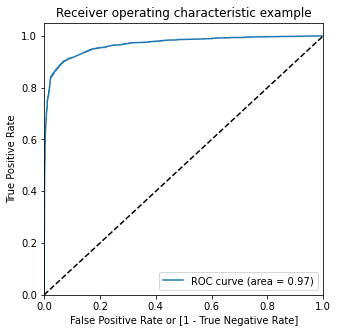

In [1124]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [1125]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.994674,1,1,1,1,1,1,1,1,1,1,1
1,1,0.999477,1,1,1,1,1,1,1,1,1,1,1
2,0,0.033599,0,1,0,0,0,0,0,0,0,0,0
3,1,0.973078,1,1,1,1,1,1,1,1,1,1,1
4,0,0.007051,0,1,0,0,0,0,0,0,0,0,0


In [1126]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376465  1.000000  0.000000
0.1   0.1  0.828318  0.965082  0.745745
0.2   0.2  0.885176  0.937316  0.853696
0.3   0.3  0.918910  0.901557  0.929388
0.4   0.4  0.922236  0.886411  0.943866
0.5   0.5  0.925245  0.864114  0.962154
0.6   0.6  0.924929  0.845604  0.972822
0.7   0.7  0.922870  0.830459  0.978664
0.8   0.8  0.904340  0.771140  0.984760
0.9   0.9  0.886443  0.713084  0.991110


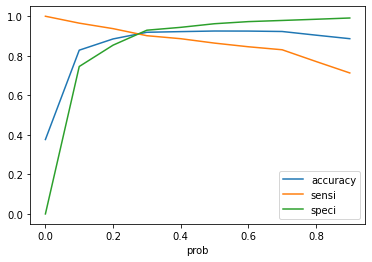

In [1127]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [1128]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.994674,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.999477,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.033599,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.973078,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.007051,0,1,0,0,0,0,0,0,0,0,0,0


In [1139]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.994674,1,1,1,1,1,1,1,1,1,1,1,1,99
1,1,0.999477,1,1,1,1,1,1,1,1,1,1,1,1,100
2,0,0.033599,0,1,0,0,0,0,0,0,0,0,0,0,3
3,1,0.973078,1,1,1,1,1,1,1,1,1,1,1,1,97
4,0,0.007051,0,1,0,0,0,0,0,0,0,0,0,0,1


In [1130]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9189103579347482

In [815]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3659,  278],
       [ 234, 2143]], dtype=int64)

In [816]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [817]:
# Calculate Sensitivity

Sensitivity = TP/(TP+FN)

In [818]:
Sensitivity

0.9015565839293227

In [819]:
# Calculate Specificity

Specificity= TN/(TN+FP)

In [820]:
Specificity

0.9293878587757175

In [821]:
# Calculate Precision

Precision = TP/(TP+FP)

In [822]:
Precision

0.8851714167699298

In [823]:
# Calculate Recall

Recall =TP/(TP+FN)

In [824]:
Recall

0.9015565839293227

In [825]:
F1_score = 2 * (Precision * Recall) / (Precision + Recall)

In [826]:
F1_score

0.8932888703626511

# Results based on the Train Set
## 1.Accuracy = 91.8%
## 2.Sensistivity(Recall)=90%
## 3.Specificity=92.9%
## 4.Precision=88.5%
## 5.F1_score=89.3%

### Precision and Reacall Score

In [827]:
from sklearn.metrics import precision_score, recall_score


In [828]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.8851714167699298

In [829]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9015565839293227

In [830]:
from sklearn.metrics import precision_recall_curve

In [831]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

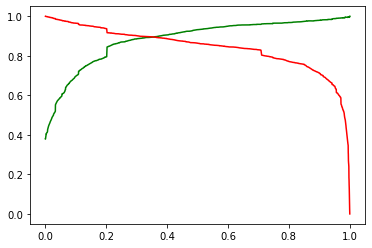

In [832]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Predictions on the Test Set

In [833]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [834]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Mentioned,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5130,-1.067817,-0.874028,-1.131710,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
6929,0.606681,-0.820864,1.300957,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1484,0.271781,-0.644872,0.814423,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
6519,-0.398018,2.024341,-0.158643,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
7472,-0.398018,1.666857,-0.158643,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1


In [835]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Mentioned,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
5130,-0.874028,0,1,0,0,1,0,0,0,0,1,0,0,1,0
6929,-0.820864,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1484,-0.644872,0,0,0,0,0,0,1,0,0,0,1,0,1,0
6519,2.024341,0,0,0,0,0,0,1,0,0,0,1,0,0,1
7472,1.666857,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [836]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)

In [837]:
X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Mentioned,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
5130,1.0,-0.874028,0,1,0,0,1,0,0,0,0,1,0,0,1,0
6929,1.0,-0.820864,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1484,1.0,-0.644872,0,0,0,0,0,0,1,0,0,0,1,0,1,0
6519,1.0,2.024341,0,0,0,0,0,0,1,0,0,0,1,0,0,1
7472,1.0,1.666857,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [838]:
X_test_sm.shape

(2706, 16)

In [839]:
X_test_sm.drop(['Last Activity_SMS Sent'], 1, inplace = True)

In [840]:
y_test_pred = res.predict(X_test_sm)

In [841]:
y_test_pred[:10]

5130    0.021774
6929    0.066274
1484    0.001193
6519    0.301886
7472    0.998852
7920    0.090302
3962    0.066835
6135    0.033599
8701    0.966294
5461    0.998077
dtype: float64

In [842]:
# Converting y_pred to a dataframe

y_pred_df= pd.DataFrame(y_test_pred)

In [843]:
y_pred_df.head()

,0
5130,0.021774
6929,0.066274
1484,0.001193
6519,0.301886
7472,0.998852


In [844]:
# Converting y_test to dataframe

y_test_df1 = pd.DataFrame(y_test)

In [845]:
y_test_df1.head()

,Converted
5130,0
6929,0
1484,0
6519,0
7472,1


In [846]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df1.reset_index(drop=True, inplace=True)

In [847]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df1, y_pred_df],axis=1)

In [848]:
y_pred_final.head()

,Converted,0
0,0,0.021774
1,0,0.066274
2,0,0.001193
3,0,0.301886
4,1,0.998852


In [849]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Converted_prob'})

In [850]:
y_pred_final.head()

,Converted,Converted_prob
0,0,0.021774
1,0,0.066274
2,0,0.001193
3,0,0.301886
4,1,0.998852


In [851]:
# Make predictions on the test set using 0.3 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [852]:
# Check y_pred_final

y_pred_final.head()

,Converted,Converted_prob,final_predicted
0,0,0.021774,0
1,0,0.066274,0
2,0,0.001193,0
3,0,0.301886,1
4,1,0.998852,1


In [1137]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Converted,Converted_prob,final_predicted,Lead_Score
0,0,0.021774,0,2
1,0,0.066274,0,7
2,0,0.001193,0,0
3,0,0.301886,1,30
4,1,0.998852,1,100


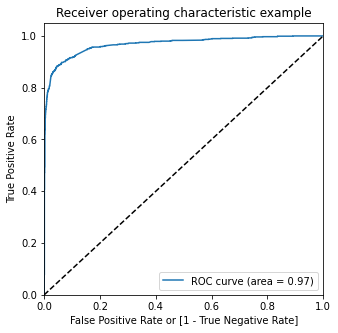

In [1135]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_prob)

In [853]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9135254988913526

In [854]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1521,  137],
       [  97,  951]], dtype=int64)

In [855]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [856]:
# Calculate Precision

Precision = TP/(TP+FP)


In [857]:
Precision

0.8740808823529411

In [858]:
# Calculate Recall

Recall =TP/(TP+FN)

In [859]:
Recall

0.9074427480916031

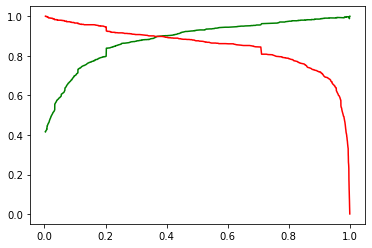

In [860]:
from sklearn.metrics import precision_recall_curve
y_pred_final.Converted, y_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [861]:
F1_score = 2 * (Precision * Recall) / (Precision + Recall)

In [862]:
F1_score

0.8904494382022472

In [863]:
Sensitivity = TP/(TP+FN)

In [864]:
Sensitivity

0.9074427480916031

In [865]:
Specificity= TN/(TN+FP)

In [866]:
Specificity

0.9173703256936068

# Results based on the Test Set
## 1.Accuracy = 91.3%
## 2.Sensistivity(Recall)=90.7%
## 3.Specificity=91.7%
## 4.Precision=87.4%
## 5.F1_score=89%